<a href="https://colab.research.google.com/github/ush-naaa/DevHUB/blob/main/NOV/Task%202/Credit_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
# Data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# **Upload Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_dataset.csv to loan_dataset (5).csv


# **Load Dataset**

In [ ]:
df = pd.read_csv('loan_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **Check Missing Values**

In [ ]:
df.isnull().sum()


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# **Handle Missing Values**

In [ ]:
# Fill numeric columns with median
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


# **EDA: Loan Amount Distribution**

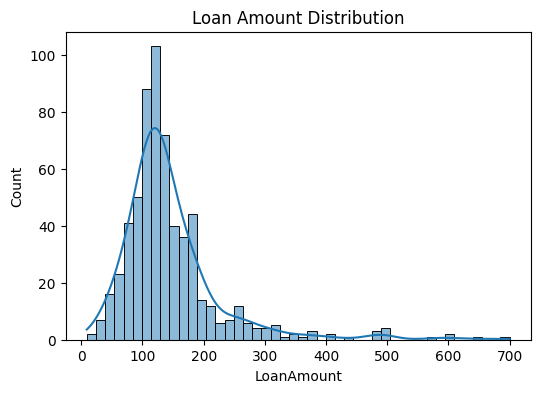

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# **EDA: Education Levels**

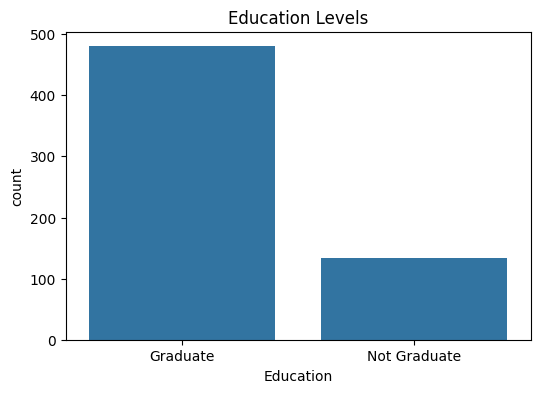

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Education', data=df)
plt.title("Education Levels")
plt.show()

# **EDA: Income vs Loan Amount**

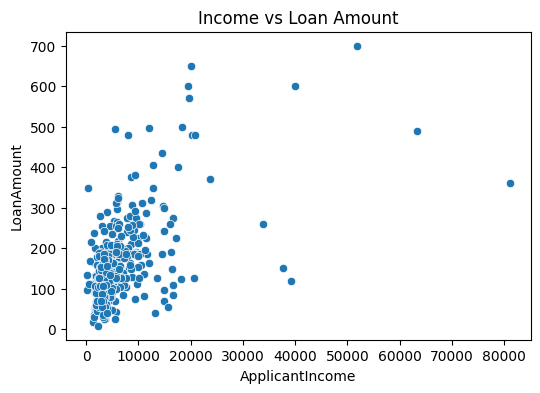

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'])
plt.title("Income vs Loan Amount")
plt.show()

# **EDA: Property Area vs Loan Status**

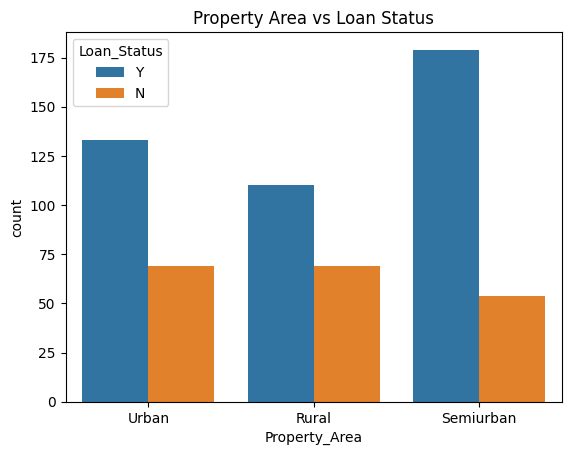

In [ ]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Property Area vs Loan Status")
plt.show()


# **Encode Categorical Variables**

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


# **Split Features and Target**

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Scale Numeric Features**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Train Logistic Regression**

In [ ]:
log_model = LogisticRegression(max_iter=5000, solver='liblinear')
log_model.fit(X_train_scaled, y_train)

log_pred = log_model.predict(X_test_scaled)

# **Train Decision Tree**

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(X_train_scaled, y_train)

tree_pred = tree_model.predict(X_test_scaled)

# **Evaluate Logistic Regression**

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("---------------------------------------------------------")
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.7886178861788617
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# **Confusion Matrix Logistic Regression**

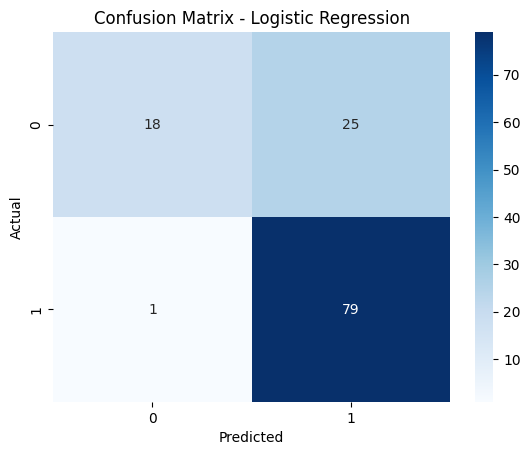

In [ ]:
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Evaluate Decision Tree**

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print("---------------------------------------------------------")
print(classification_report(y_test, tree_pred))

Decision Tree Accuracy: 0.7723577235772358
---------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



# **Confusion Matrix Decision Tree**

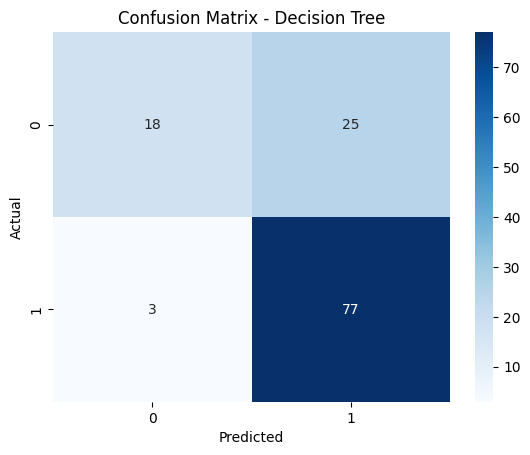

In [ ]:
cm = confusion_matrix(y_test, tree_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Conclusion**:
Both models were trained to predict loan default. Logistic Regression achieved an accuracy of **~79%**, slightly higher than Decision Tree (**77%**). Logistic Regression also had better recall for approved loans (class 1), making it the preferred model for this dataset.